In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
import matplotlib.axis as axs

In [2]:
df_purchase = pd.read_csv('purchase data.csv')
scaler = pickle.load(open('scalar.pickle','rb'))
pca = pickle.load(open('pca.pickle','rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle','rb'))
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
df_purchase_segm_std_pca = pca.transform(df_purchase_segm_std)
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_std_pca)
df_purchase_predictors = df_purchase.copy()
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca,prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)
df_pa = df_purchase_predictors

In [62]:
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')
df_purchase_quantity['Price Incidence'] = (df_purchase_quantity['Brand_1']*df_purchase_quantity['Price_1']+
                                           df_purchase_quantity['Brand_2']*df_purchase_quantity['Price_2']+
                                           df_purchase_quantity['Brand_3']*df_purchase_quantity['Price_3']+
                                           df_purchase_quantity['Brand_4']*df_purchase_quantity['Price_4']+
                                           df_purchase_quantity['Brand_5']*df_purchase_quantity['Price_5'])
df_purchase_quantity['Promotion Incidence'] = (df_purchase_quantity['Brand_1']*df_purchase_quantity['Promotion_1']+
                                           df_purchase_quantity['Brand_2']*df_purchase_quantity['Promotion_2']+
                                           df_purchase_quantity['Brand_3']*df_purchase_quantity['Promotion_3']+
                                           df_purchase_quantity['Brand_4']*df_purchase_quantity['Promotion_4']+
                                           df_purchase_quantity['Brand_5']*df_purchase_quantity['Promotion_5'])

In [57]:
X = df_purchase_quantity[['Price Incidence', 'Promotion Incidence']]
Y = df_purchase_quantity['Quantity']
model_quantity = LinearRegression()
model_quantity.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
model_quantity.coef_

array([-0.8173651 , -0.10504673])

In [25]:
price_range = np.arange(0.5,3.5,.01)
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price Incidence']=price_range
df_price_elasticity_quantity['Promotion Incidence']=1

In [27]:
beta_quantity = model_quantity.coef_[0]
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)
price_elasticity_quantity_promotion_yes = beta_quantity*price_range/predict_quantity

In [37]:


df_price_elasticities['PE quantity promotion 1']=price_elasticity_quantity_promotion_yes
df_price_elasticities

,0,PE quantity promotion 0,PE quantity promotion 1
0,0.50,-0.099543,-0.102157
1,0.51,-0.101736,-0.104413
2,0.52,-0.103939,-0.106679
3,0.53,-0.106150,-0.108954
4,0.54,-0.108369,-0.111238
...,...,...,...
295,3.45,-1.664290,-1.774292
296,3.46,-1.677205,-1.788634
297,3.47,-1.690246,-1.803124
298,3.48,-1.703414,-1.817766


Text(0.5, 1.0, 'price elasticity of purchase quantity with promotion')

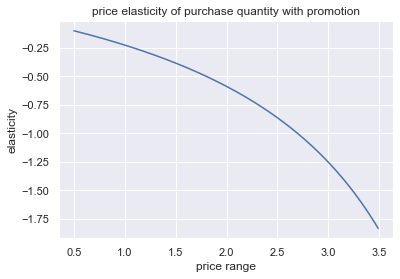

In [32]:
plt.figsize=(9,6)
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('price range')
plt.ylabel('elasticity')
plt.title('price elasticity of purchase quantity with promotion')

In [38]:
df_price_elasticity_quantity['Promotion Incidence']=0
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)
price_elasticity_quantity_promotion_no = beta_quantity*price_range/predict_quantity

df_price_elasticities['PE quantity promotion 0']=price_elasticity_quantity_promotion_no
df_price_elasticities

,0,PE quantity promotion 0,PE quantity promotion 1
0,0.50,-0.099543,-0.102157
1,0.51,-0.101736,-0.104413
2,0.52,-0.103939,-0.106679
3,0.53,-0.106150,-0.108954
4,0.54,-0.108369,-0.111238
...,...,...,...
295,3.45,-1.664290,-1.774292
296,3.46,-1.677205,-1.788634
297,3.47,-1.690246,-1.803124
298,3.48,-1.703414,-1.817766


Text(0.5, 1.0, 'price elasticity of purchase quantity without promotion')

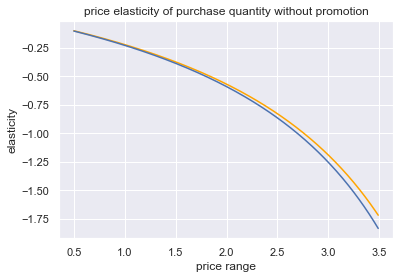

In [41]:
plt.figsize=(9,6)
plt.plot(price_range, price_elasticity_quantity_promotion_no, color = 'orange')
plt.plot(price_range, price_elasticity_quantity_promotion_yes)

plt.xlabel('price range')
plt.ylabel('elasticity')
plt.title('price elasticity of purchase quantity without promotion')